# 나와 비슷한 유명인 찾기

## 1.데이터 준비

### (1)데이터 전처리

In [514]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 사진에서 얼굴을 찾아주는 함수
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    # print(image_file)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

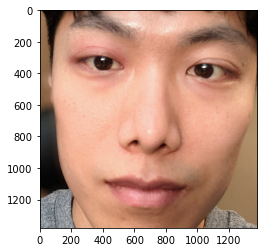

In [488]:
dir_path = os.getenv('HOME')+'/workplace/aiffel/face_embedding/images'
image_file = os.path.join(dir_path, '박종훈.jpg')

face = get_gropped_face(image_file)
plt.imshow(face)


In [489]:
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['성시경.jpg', '이시언.jpeg', '강경준.jpeg', '김형범.jpeg', '이철민.jpeg', '이대근.jpeg', '티모시 달튼.jpeg', '로저 무어.jpeg', '김성오.jpeg', '노종현.jpeg', '성지루.jpeg', '배용준.jpeg', '철면수심.jpg', '이승철.jpeg', '수지.jpg', '주호민.jpeg', '우기.jpg', '박건형.jpeg', '안재홍.jpeg', '윤종훈.jpeg', '지민(BTS).jpg', '조승우.jpeg', '박주형.jpeg', '조달환.png', '윤경신.jpg', '하승진.jpg', '김영호.jpeg', '안내상.jpeg', '강이석.png', '김민상.jpeg', '오대환.jpeg', '김래원.jpeg', '고경표.jpeg', '양동근.jpeg', '류담.jpeg', '오재원.jpg', '서태화.jpeg', '고윤.jpeg', '김용건.png', '김정태.jpeg', '이한위.jpeg', '주진모(올드).jpg', '유일.jpeg', '무라니시.png', '김도현.jpeg', '이정진.jpeg', '이일재.jpeg', '김형준.gif', '지호.jpg', '김일우.jpeg', '이재백.jpeg', '이종수.jpeg', '오현경.jpeg', '노주현.jpeg', '황정민.jpg', '권율.jpeg', '꽈두룹.jpeg', '박진우_73.jpeg', '잭 블랙.jpeg', '아이즈원김채원.jpg', '고창석.jpeg', '도상우.jpeg', '이문식.png', '박상원.jpeg', '온앤오프라운.jpg', '김민석.jpeg', '김서하.jpeg', '박근형.jpeg', '임하룡.jpeg', '케빈 스페이시.jpeg', '변우민.jpeg', '송종호.jpeg', '송원근.jpeg', '고우림.jpeg', '이근대위.jpeg', '문성근.jpeg', '박해준.jpeg', '박희순.jpg', '김준한.jpeg', '윤종신.jpeg', '이기우.png', '김재욱.jpeg', '

In [545]:
# 얼굴 영역을 구하는 함수(이전 스텝에서 구현)
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.03347211,  0.05046006,  0.03161264, -0.01870164, -0.0744019 ,
        -0.01017547, -0.02840485, -0.10350185,  0.09765242, -0.14240833,
         0.1921937 , -0.09361663, -0.18699662, -0.08857047,  0.01014442,
         0.1210909 , -0.21640994, -0.15288275, -0.02319922,  0.00948207,
         0.07646175, -0.05009465, -0.0127934 ,  0.00468021, -0.08553477,
        -0.3489821 , -0.08843075, -0.07325185,  0.06083046, -0.06931375,
        -0.09229007,  0.01849315, -0.26830918, -0.0837319 , -0.0293607 ,
         0.05536344, -0.02725353, -0.05410425,  0.17021465,  0.01690644,
        -0.21627767,  0.02577245, -0.00767664,  0.20914836,  0.13169499,
         0.04631821,  0.00197519, -0.1142277 ,  0.098699  , -0.15580936,
         0.04657209,  0.17770597,  0.08212134,  0.05912414, -0.04189845,
        -0.12979899,  0.01739864,  0.07076497, -0.09923234,  0.0666656 ,
         0.13446508, -0.05305281,  0.00080077, -0.08728537,  0.22076067,
         0.00138301, -0.09149761, -0.17898506,  0.0

In [501]:
# 임베딩 딕셔너리를 구성하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) > 0:
            embedding = get_face_embedding(face)
            if len(embedding) > 0:
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

In [502]:
embedding_dict = get_face_embedding_dict(dir_path)
print(len(embedding_dict))
embedding_dict['박종훈']

614


array([-0.06505065,  0.11105216,  0.04756531, -0.04101498, -0.10598738,
       -0.00430197, -0.03738241, -0.14353129,  0.12819032, -0.10573048,
        0.20098992, -0.0749566 , -0.21526073, -0.13306534, -0.03874857,
        0.16848944, -0.21208039, -0.1894971 ,  0.02395403,  0.01230407,
        0.12629205,  0.00146563,  0.00723786,  0.01638999, -0.1197489 ,
       -0.31784186, -0.073787  , -0.02754655,  0.0562047 , -0.10304601,
       -0.01393104, -0.01871074, -0.26203287, -0.00966051,  0.01765437,
        0.05887478, -0.03024611, -0.0768246 ,  0.19372371, -0.01353439,
       -0.27360272,  0.04083385,  0.04384355,  0.21900025,  0.12724262,
        0.00672348, -0.00918973, -0.1643025 ,  0.08732381, -0.13513339,
        0.01058287,  0.20693654,  0.04148349,  0.02889643, -0.04309497,
       -0.11875974, -0.01022736,  0.09693858, -0.12610863,  0.05970007,
        0.10872877, -0.08071276, -0.03973087, -0.10138026,  0.13300268,
       -0.02660216, -0.11195717, -0.22424586,  0.07631398, -0.15

In [503]:
# 사진간에 벡터거리를 구하는 함수
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('박종훈', '박종훈2')

0.400537867926671

In [504]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('박종훈')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

38603, -0.01177501,  0.020918  ,
         -0.09445931,  0.07375614,  0.10682786, -0.42577028,  0.23104258,
          0.15356162, -0.02001827,  0.13538603,  0.07251234,  0.04504132,
         -0.00291495,  0.02704725, -0.19614825, -0.17932394,  0.05824627,
          0.02148463,  0.01873677, -0.00491746])),
 ('biden',
  array([-3.94153334e-02,  1.71419963e-01,  6.19103611e-02,  1.20813865e-03,
         -1.26029924e-01,  4.76813056e-02, -7.64570385e-02, -1.04280867e-01,
          7.64882043e-02, -2.97834557e-02,  2.05395296e-01, -3.52288187e-02,
         -2.62895197e-01,  3.47554944e-02,  4.22611237e-02,  1.28316373e-01,
         -9.96532217e-02, -8.62354189e-02, -1.99026316e-01, -9.20077860e-02,
         -4.13053622e-03, -1.84574572e-03,  7.12383687e-02, -8.01764894e-04,
         -1.72330856e-01, -2.43130982e-01, -6.68652281e-02, -1.27878666e-01,
         -5.89288399e-02, -1.38829440e-01,  2.90382653e-02, -7.59892464e-02,
         -1.80036172e-01, -6.59002885e-02, -8.85275006e-03, -5.4580

## 2.~~어찌보면~~ 모델 구현

In [529]:
# 비슷한 얼굴을 찾는 함수
def get_nearest_face(name, top = 6): 
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top + 1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

## 3.테스트하기

In [530]:
get_nearest_face('박종훈')

순위 1 : 이름(박종훈2), 거리(0.400537867926671)
순위 2 : 이름(오한결), 거리(0.4075274720640814)
순위 3 : 이름(이수완), 거리(0.4120498220268132)
순위 4 : 이름(이은형), 거리(0.4136820086811188)
순위 5 : 이름(옥냥이), 거리(0.4154829576063189)
순위 6 : 이름(오정세), 거리(0.4220972810331382)


## 4.결과확인 및 시각화

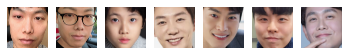

In [531]:
dir_path = os.getenv('HOME')+'/workplace/aiffel/face_embedding/images'
images = ['박종훈.jpg', '박종훈2.jpg', '오한결.jpeg', '이수완.jpeg', '이은형.jpeg', '옥냥이.jpeg', '오정세.jpeg']
fig = plt.figure()
rows = 1
cols = 7
i = 1

for image in images:
    face = get_gropped_face(os.path.join(dir_path, image))
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(face)
    ax.axis("off")
    i += 1

plt.show()

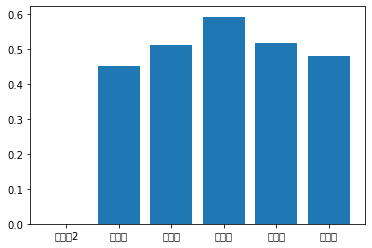

In [549]:
x = np.arange(6)

values = []
names = []
for image in images:
    name = image[:image.find('.')]
    if image != images[0]:
        names.append(name)
        values.append(get_distance(names[0], name))
    
plt.bar(x, values, tick_label=names)
plt.xticks(x, names)
plt.show()

## 5.회고

이번 프로젝트는 생각보다 쉬웠는데 아무래도 자연어가 어려운게 맞는 것 같다.
모델?의 성능은 내 사진이 가장 근접하게 나오는 걸로 봐서는 맞는 것 같기도 한데
나머지 사진들을 보면 또 일관성이 없어서 틀린 것 같기도 하다.

마음같아서는 노드 중간에 나온 다차원그래프로 사진을 표현하고 싶지만 좀 더 공부를 하고 도전하기로 했다.